
# Investigating movies Dataset (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Do you think that movies' genres is an important factor to determine the voting a movie can get?
In this notebook, we will explore the movies dataset (TMDB) and provide some analysis on their properties.


#### Business understanding: 
The project aims to investigate the impact of genres of the movies on the voting they get. This investigating can help in many cases, for example: providing some offers or sales with the movies that belong to the genres of the highest popularity or average voting.
#### Understanding the data: 
The data are publicly available on Kaggle: "https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset"
It contains info about 10865 movies. The information are provided in form of 21 features including id, title, vote count, average voting, genres, revenue and so on. The data have different data types, it also contains missing values in some solumns.
#### Prepare Data
The data will be prepared by selecting the important columns that are useful in our analysis, checking null values and removing them if their count is not significant, otherwise, they will be replaced by the median. Finally, the columns with multiple categorical values will be replaced by get dummies.
#### Data Modeling
In this part, we will just use simple statistical steps (e.g. grouping, sorting values, getting the maximum and minimum values, and calculating the mean).
### Results
Results will be visualized. For future work, we might discover the relationship between the voting and properties other than the genres.


First, let's start by importing the necessary libraries 

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# <a id='wrangling'></a>
## Data Wrangling


Loading data and taking a look at it!

In [15]:
# Load data 
df = pd.read_csv('tmdb-movies.csv')


In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
df.shape

(10866, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [16]:
# chechk rows with null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Let's start our process by cleaning the data 

In [17]:
def clean(df):
    """
    INPUT: movies dataset as dataframe
    OUTPUT: the dataset after selecting necessary columns,
            removing rows with null values 
            and get dummies of 'genres' 
    """
    #select the columns that we care about to answer our questions
    df=df[['id','popularity','original_title','genres', 'vote_count', 'vote_average'  ]]
    
        
    #remove rows with null values
    df=df.dropna()
    
    # handle 'genre' column by replacing it with a new set of columns, each one represent one genre
    genres=df['genres'].str.get_dummies(sep='|')
    df=df.drop(['genres'], axis=1)
    df=pd.concat([df, genres], axis=1)
    
    return df
    
df = clean(df)    
df.head()

,id,popularity,original_title,vote_count,vote_average,Action,Adventure,Animation,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,32.985763,Jurassic World,5562,6.5,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,76341,28.419936,Mad Max: Fury Road,6185,7.1,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,262500,13.112507,Insurgent,2480,6.3,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,140607,11.173104,Star Wars: The Force Awakens,5292,7.5,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,168259,9.335014,Furious 7,2947,7.3,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Now, our data is ready by selecting the necessary columns, removing rows with null values and get dummies of genres. 
There were 23 rows that have null values in 'genres' column. These rows were removed because the most important  attribute in our analysis is "genres", so, missing values in this column won't be useful in analysis. In addition,  the total number of rows with missing values after selecting the necessary columns is only 23, which means removing them won't has a negative effect on our analysis. 


<a id='eda'></a>
## Data Analysis
> 

Let's explore the data to answer our question. 

Question 1:
    What is the movie that has the highest average voting? what its genres? how many times it has been voted?

In [13]:
# sort movies based on 'vote_average' and select the movie with the highest value
row=df.sort_values('vote_average', ascending=False).iloc[0]
row[row!=0]

id                                       125336
popularity                             0.006925
original_title    The Story of Film: An Odyssey
vote_count                                   14
vote_average                                9.2
Documentary                                   1
Name: 3894, dtype: object

The result shows that "The Story of Film: An Odyssey" is the movie that has the highest average voting, which is "9.2", the movie belongs to Documentary genre and has 14 voting count.

Question 2:
    What is the movie that has the highest voting count? what its genres and its average voting?

In [14]:
# sort movies based on 'vote_count' and select the movie with the highest value
row=df.sort_values('vote_count', ascending=False).iloc[0]
row[row!=0]

id                     27205
popularity           9.36364
original_title     Inception
vote_count              9767
vote_average             7.9
Action                     1
Adventure                  1
Mystery                    1
Science Fiction            1
Thriller                   1
Name: 1919, dtype: object

We can see that 'Inception' is the movie that got the highest count of voting, with average voting equals to 7.9. The movie belongs to 'Action', 'Adventure', 'Mystery', 'Science Fiction' and 'Thriller'.

In [ ]:
Question 3:
    What are the most common 5 genres? 

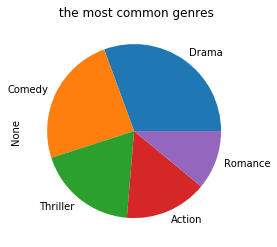

In [181]:
#calculate the number of movies in each genres and sort the genres descendingly
genr_count= df.iloc[:,5:].sum().sort_values(ascending=False)
genr_count.head().plot(kind='pie', title=' the most common genres') 

The bar plot shows that Drama is the most common genre, followed by Comedy, then Thriller.

Question 4:
    What is the genre that has the maximum voting? 

In [172]:
#create a function that takes one column and calculate its mean for each genre
def property(column):
    """
    INPUT: the column name to calculate its mean 
    OUTPUT: a list of the mean values of all genres 
    """
    list_gen=[]
    for genre in genr_count.index :
        gen=df.where(df[genre]==1)
        list_gen.append(round(gen[column].mean(),1))
    return list_gen

#create a series with index of genres names, and average voting of each genre 
avg_vot=pd.Series(index=genr_count.index, data=property('vote_average'))

In [173]:
#print the genre that has maximum average voting 
print(avg_vot.idxmax(), avg_vot.max())

Documentary 6.9


The result shows that the movies of documentary genre have the highest average voting than other genres.

Question 5:
    What is the genre that has the highest popularity? 

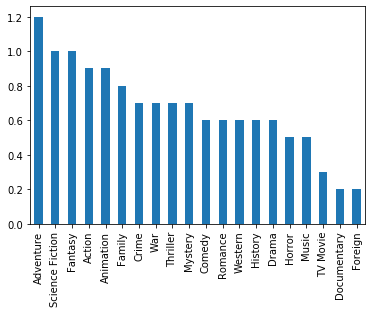

In [175]:
#create a series with index of genres names, and the popularity value of each genre
popularity=pd.Series(index=genr_count.index, data=property('popularity')).sort_values(ascending=False)
popularity.plot(kind='bar')

The bar plot shows that Adventure is the most polpular genre, followed by Fiction and Fantasy. 
The plot also shows that the least polpular genres are Foreign and Documentary. 



# Conclusions

We can notice that movies genres play a key role on the popularity and voting of the movies. However, it is not the only factor! Other factors might also have their impacts, such as the title and production company.